# Emerging Tech - Sarah O'Connor - G00423847
---

In [61]:
import random
import itertools as it

## Problem 1: Generating Random Boolean Functions

The [Deutsch–Jozsa algorithm](https://quantum.cloud.ibm.com/learning/en/modules/computer-science/deutsch-jozsa) is designed to work with functions that accept a fixed number of [Boolean inputs](https://realpython.com/python-boolean/) and return a single [Boolean output](https://realpython.com/python-boolean/).
Each function is guaranteed to be either constant (always returns `False` or always returns `True`) or balanced (returns `True` for exactly half of the possible input combinations).
Write a Python function `random_constant_balanced` that returns a randomly chosen function from the set of constant or balanced functions taking four Boolean arguments as inputs.

### Explanation


Points to hit:
1. Problem context + Define the task
- what is Deutsch-Jozsa problem statement
    - https://quantum.cloud.ibm.com/learning/en/courses/fundamentals-of-quantum-algorithms/quantum-query-algorithms/deutsch-jozsa-algorithm
    - The Deutsch–Jozsa problem is a decision problem about a special type of Boolean function.
    - You're given a function:
    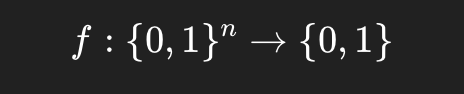
    - The input is an n-bit binary string
    - The output is one bit (0 or 1)
    - This algorithm promises that the function will either be constant or balanced, guaranteed
    - The task is to determine whether the function is constant or balanced using as few queries as possible.

    additional links
    https://pere-christophe.medium.com/deutsch-jozsa-or-how-to-evaluate-a-balanced-function-b19fe0711187
    https://www.youtube.com/watch?v=7MdEHsRZxvo&pp=ygUORGV1dHNjaC1Kb3pzYSA%3D
    https://www.youtube.com/watch?v=QcK0GK7DUh8&pp=ygUORGV1dHNjaC1Kb3pzYSA%3D
    https://qniverse.in/docs/deutsch-jozsa-algorithm/


- What do 'constant' and 'balanced' mean here for a boolean function ? 
- why is it restricted to constant and balanced

2. Function details
- possible inputs + why
- different combinations
- how many constant functions vs balances functions ? 

3. Implementation strategy
- truth table and why its useful 
- does it produce a uniform distribution? 

4. Correctness + verifying
- how to verify if a function is balanced/constant programmatically?
- typical mistakes?
- how to make it reproducible?

### Implementation

In [62]:
def random_constant_balanced():
    """Return a random 4-bit in, 1-bit out function that is constant or balanced."""

    # Fixed list of all 16 inputs in a known order
    inputs = list(it.product((0, 1), repeat=4))

    # Choose outputs: either all 0 or all 1, or eight 0s + eight 1s shuffled.
    if random.choice(['constant', 'balanced']) == 'constant':
        bit = random.choice([0, 1])
        outputs = (bit,) * 16
    else:
        outputs = [0]*8 + [1]*8
        random.shuffle(outputs)
        outputs = tuple(outputs)

    # Build a lookup table from input -> output
    table = dict(zip(inputs, outputs))

    def f(a, b, c, d):
        return table[(a, b, c, d)]

    # Optional debug
    f.outputs = outputs
    return f

### Test

In [63]:
def test_random_constant_balanced():
    """Generate a function and test whether it is constant or balanced."""

    f = random_constant_balanced()

    # Generate all 16 inputs
    inputs = list(it.product((0, 1), repeat=4))

    # Collect outputs
    outputs = [f(*x) for x in inputs]

    total_ones = sum(outputs)

    # Determine expected classification
    if total_ones == 0 or total_ones == 16:
        expected = "constant"
    elif total_ones == 8:
        expected = "balanced"
    else:
        expected = "ERROR (neither constant nor balanced)"

    # print results
    print("Inputs and Outputs:")
    print("-------------------")
    for x, y in zip(inputs, outputs):
        print(f"{x} -> {y}")

    print("\nSummary:")
    print("--------")
    print(f"Total number of 1s: {total_ones}")
    print(f"Expected type: {expected}")

    return expected

In [64]:
test_random_constant_balanced()

Inputs and Outputs:
-------------------
(0, 0, 0, 0) -> 1
(0, 0, 0, 1) -> 1
(0, 0, 1, 0) -> 1
(0, 0, 1, 1) -> 0
(0, 1, 0, 0) -> 0
(0, 1, 0, 1) -> 1
(0, 1, 1, 0) -> 1
(0, 1, 1, 1) -> 0
(1, 0, 0, 0) -> 0
(1, 0, 0, 1) -> 0
(1, 0, 1, 0) -> 0
(1, 0, 1, 1) -> 0
(1, 1, 0, 0) -> 1
(1, 1, 0, 1) -> 1
(1, 1, 1, 0) -> 0
(1, 1, 1, 1) -> 1

Summary:
--------
Total number of 1s: 8
Expected type: balanced


'balanced'

---

## Problem 2: Classical Testing for Function Type

[Deutsch's algorithm](https://quantum.cloud.ibm.com/learning/en/courses/fundamentals-of-quantum-algorithms/quantum-query-algorithms/deutsch-algorithm) is designed to demonstrate a [potential advantage of quantum computing](https://www.quantamagazine.org/john-preskill-explains-quantum-supremacy-20191002/) over classical computation.
To understand this advantage, we must first understand the classical cost of solving the underlying problem.
Write a Python function `determine_constant_balanced` that takes as input a function `f`, as defined in Problem 1.
The function should analyze `f` and return the string `"constant"` or `"balanced"` depending on whether the function is constant or balanced.
Write a brief note on the efficiency of your solution.
What is the maximum number of times you need to call `f` to be 100% certain whether it is constant or balanced?

## Problem 3: Quantum Oracles

[Deutsch's algorithm](https://quantum.cloud.ibm.com/learning/en/courses/fundamentals-of-quantum-algorithms/quantum-query-algorithms/deutsch-algorithm) is the simplest example of a [quantum algorithm](https://www.ibm.com/quantum/blog/group-theory) using [superposition](https://scienceexchange.caltech.edu/topics/quantum-science-explained/quantum-superposition) to determine a [global property](https://plato.stanford.edu/archives/fall2008/entries/qt-entangle/#5) of a function with a single evaluation.
In the single-input case, there are four possible Boolean functions.
Using Qiskit, create the appropriate [quantum oracles](https://quantumcomputing.stackexchange.com/a/4626) for each of the possible single-Boolean-input functions used in Deutsch's algorithm.
Demonstrate their use and explain how each oracle implements its corresponding function.


## Problem 4: Deutsch's Algorithm with Qiskit

Use [Qiskit](https://www.ibm.com/quantum/qiskit) to design a [quantum circuit](https://quantum.cloud.ibm.com/learning/en/courses/basics-of-quantum-information/quantum-circuits/introduction) that solves Deutsch's problem for a function with a single Boolean input.
Implement the necessary circuit and demonstrate its use with each of the quantum oracles from Problem 3.
Describe how the interference pattern produced by the circuit allows you to determine whether the function is constant or balanced using only one query to the oracle.

## Problem 5: Scaling to the Deutsch–Jozsa Algorithm

The [Deutsch–Jozsa algorithm](https://quantum.cloud.ibm.com/learning/en/modules/computer-science/deutsch-jozsa) generalizes Deutsch's approach to functions with several input bits.
Use [Qiskit](https://www.ibm.com/quantum/qiskit) to create a quantum circuit that can handle the four-bit functions generated in Problem 1.
Explain how the classical function is encoded as a quantum oracle, and demonstrate the use of your circuit on both of the constant functions and any two balanced functions of your choosing.
Show that the circuit correctly identifies the type of each function.



***

# End